In [1]:
%matplotlib inline

from IPython.display import Image

import numpy as np

from qutip import *
from qutip.qip import *



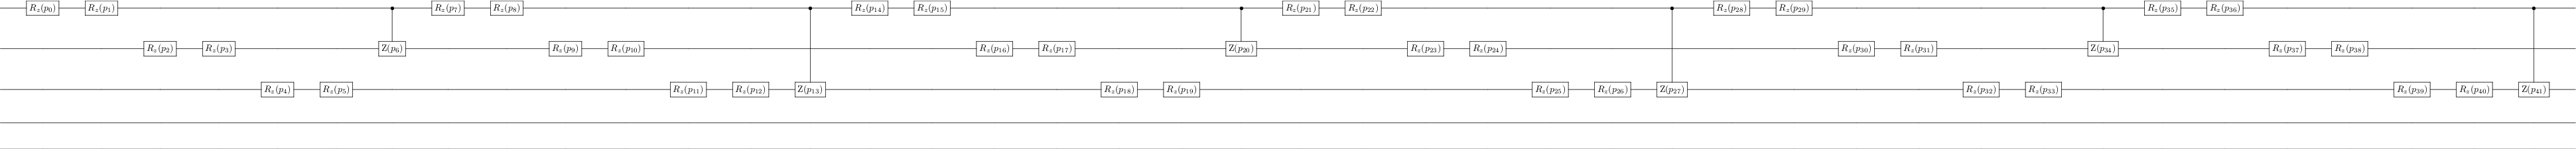

In [26]:
#encoding
paramz = [[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(3)]
paramx = [[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(3)]
paramcs = [[np.random.uniform(0,4*np.pi) for i in range(2)] for j in range(3)]
q = QubitCircuit(5,reverse_states = False)

for j in range(3):
    for i in range(3):
        q.add_gate("RZ", targets = i, arg_value = paramz[j][i], arg_label = r'p_{%d}'%(14*j + 2*i))
        q.add_gate("RZ", targets = i, arg_value = paramx[j][i], arg_label = r'p_{%d}'%(14*j + 2*i + 1))
    q.add_gate("CSIGN", controls = [0],targets = [1], arg_value = paramcs[j][0],arg_label = r'p_{%d}'%(6+ j*14))
    for i in range(3):
        q.add_gate("RZ", targets = i, arg_value = paramz[j][3 + i], arg_label = r'p_{%d}'%(14*j + 2*i + 7))
        q.add_gate("RZ", targets = i, arg_value = paramx[j][3 + i], arg_label = r'p_{%d}'%(14*j + 7 + 2*i + 1))
    q.add_gate("CSIGN", controls = [0],targets = [2], arg_value = paramcs[j][1],arg_label = r'p_{%d}'%(13 +j*14))


q.png

In [23]:
U_list0 = q.propagators()
U0 = gate_sequence_product(U_list0)
U0

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2]], shape = (128, 128), type = oper, isherm = False
Qobj data =
[[0.96787702+0.25142408j 0.        +0.j         0.        +0.j
  ... 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.96787702+0.25142408j 0.        +0.j
  ... 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.96787702+0.25142408j
  ... 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 ...
 [0.        +0.j         0.        +0.j         0.        +0.j
  ... 0.96787702-0.25142408j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  ... 0.        +0.j         0.96787702-0.25142408j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  ... 0.        +0.j         0.        +0.j
  0.96787702-0.25142408j]]

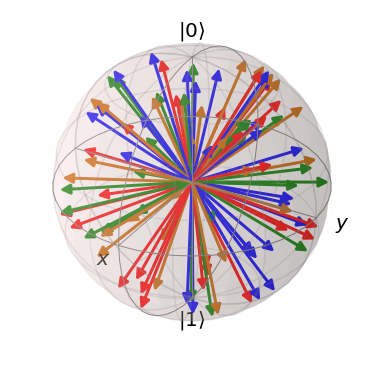

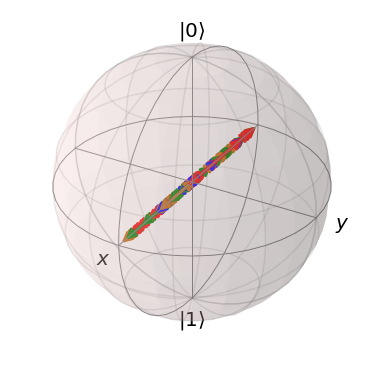

In [25]:
#bitflip error 
p = 0.5
I, X = qeye(2),sigmax()
dm1_list  = [ket2dm(rand_ket_haar(2)) for i in range(100)]
dm2_list = [(1-p)*dm1 + p*X*dm1*X for dm1 in dm1_list]
b1 = Bloch()
b1.add_states(dm1_list)
b1.show()
b2 = Bloch()
b2.add_states(dm2_list)
b2.show()


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]


In [27]:
#recovery
paramz = [[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(3)]
paramx = [[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(3)]
paramx = [[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(3)]
paramcz = [[np.random.uniform(0,4*np.pi) for i in range(2)] for j in range(3)]
paramcx = [[np.random.uniform(0,4*np.pi) for i in range(2)] for j in range(3)]
paramcy = [[np.random.uniform(0,4*np.pi) for i in range(2)] for j in range(3)]
q2 = QubitCircuit(5,reverse_states = False)

for j in range(3):
    for i in range(3):
        q.add_gate("RZ", targets = i, arg_value = paramz[j][i], arg_label = r'p_{%d}'%(14*j + 2*i))
        q.add_gate("RZ", targets = i, arg_value = paramx[j][i], arg_label = r'p_{%d}'%(14*j + 2*i + 1))
    q.add_gate("CSIGN", controls = [0],targets = [1], arg_value = paramcs[j][0],arg_label = r'p_{%d}'%(6+ j*14))
    for i in range(3):
        q.add_gate("RZ", targets = i, arg_value = paramz[j][3 + i], arg_label = r'p_{%d}'%(14*j + 2*i + 7))
        q.add_gate("RZ", targets = i, arg_value = paramx[j][3 + i], arg_label = r'p_{%d}'%(14*j + 7 + 2*i + 1))
    q.add_gate("CSIGN", controls = [0],targets = [2], arg_value = paramcs[j][1],arg_label = r'p_{%d}'%(13 +j*14))


q.png

IndexError: list index out of range